In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [7]:
import ipywidgets as widgets
import io
from PIL import Image
import cv2
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

In [17]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Define the base directories for training and testing data
train_base_dir = r'datasets\brain\Training'
test_base_dir = r'datasets\brain\Testing'

# Load training data
for label in labels:
    folderPath = os.path.join(train_base_dir, label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)

# Load testing data
for label in labels:
    folderPath = os.path.join(test_base_dir, label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f"Loaded {len(X_train)} images.")


Loaded 3264 images.


In [18]:
Y_train

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', ...,
       'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [19]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [21]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

d:\Work\Medico-main\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
m_model = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.2661 - loss: 3.7527 - val_accuracy: 0.2789 - val_loss: 1.3674
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.3064 - loss: 1.3521 - val_accuracy: 0.4048 - val_loss: 1.3615
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.4886 - loss: 1.1932 - val_accuracy: 0.4830 - val_loss: 1.1954
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.6023 - loss: 0.9336 - val_accuracy: 0.5374 - val_loss: 1.0314
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.6589 - loss: 0.8065 - val_accuracy: 0.6224 - val_loss: 0.8477
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.6911 - loss: 0.7369 - val_accuracy: 0.5238 - val_loss: 1.1290
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7199 - loss: 0.6395 - val_accuracy: 0.5986 - val_loss: 0.9078
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7644 - loss: 0.5536 - val_accuracy: 0.6190 - v

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

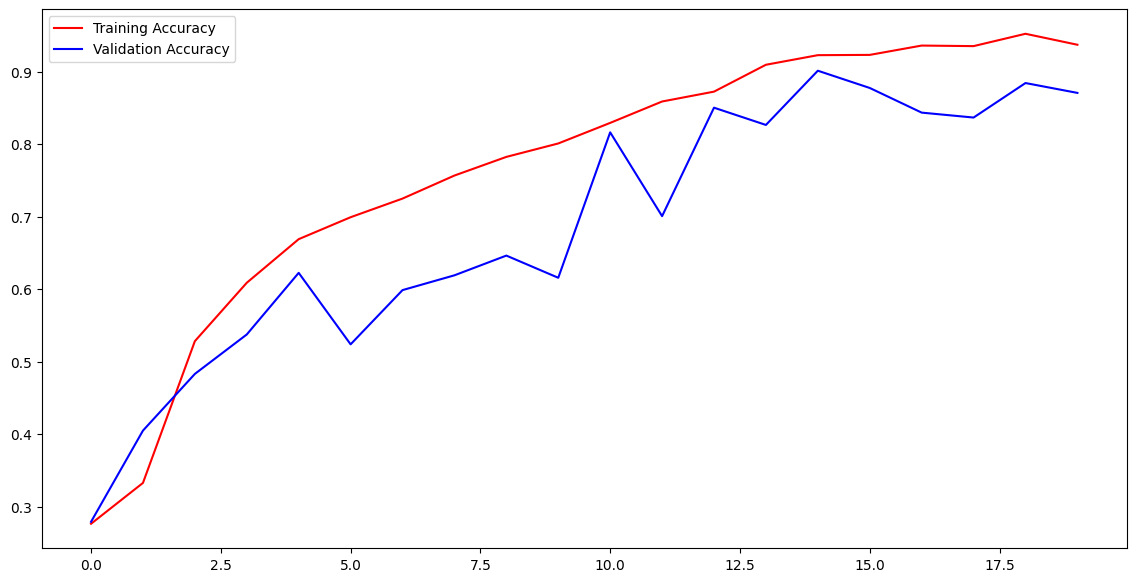

In [27]:
model.save('braintumor.h5')

acc = m_model.history['accuracy']
val_acc = m_model.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

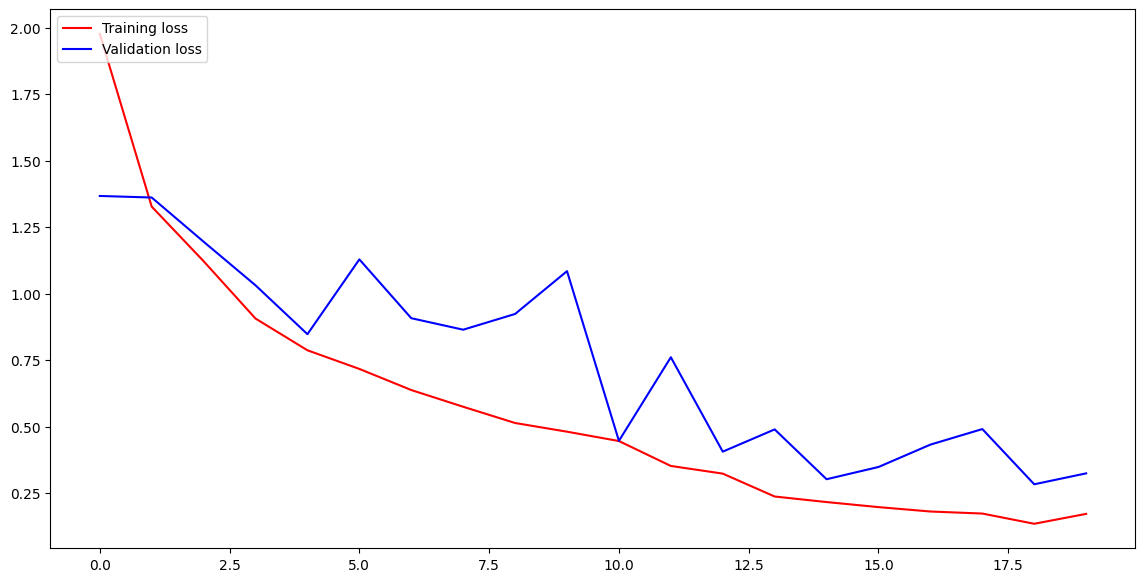

In [28]:
loss = m_model.history['loss']
val_loss = m_model.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [31]:

# Define the image path
image_path = 'datasets/brain/Training/pituitary_tumor/p (1).jpg'

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Image file not found: {image_path}")
else:
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if the image was read correctly
    if img is None:
        print(f"Failed to read image: {image_path}")
    else:
        # Resize the image
        img = cv2.resize(img, (150, 150))
        
        # Convert to numpy array and print the shape
        img_array = np.array(img)
        print(f"Image shape: {img_array.shape}")


Image shape: (150, 150, 3)


In [32]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

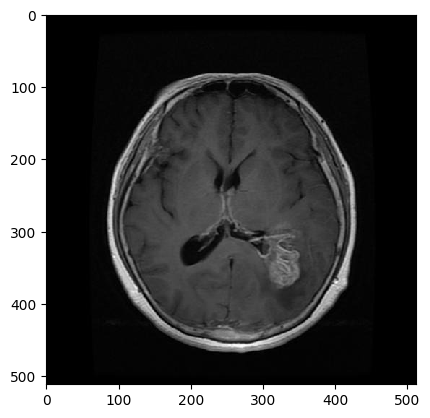

In [35]:
from tensorflow.keras.preprocessing import image

# Define the absolute image path
image_path = 'D:/Work/Medico-main/datasets/Training/glioma_tumor/gg (10).jpg'

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Image file not found: {image_path}")
else:
    # Load the image
    img = image.load_img(image_path)
    
    # Display the image
    plt.imshow(img, interpolation='nearest')
    plt.show()

In [36]:
a=model.predict(img_array)
indices = a.argmax()
a.argmax()
# argmax will give the index of most favourable tumor index from predicted probability array

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


3